#### COMPANION WORKBOOK

# 1) Introduction

## Hackathon - ‘Super Festive Sale’ revenue prediction - Classification

#### About Data
 This data was extracted from https://mlhackathon-app2.herokuapp.com/

#### <span style="color:#555">Prediction Task</span>
- The company plans to work on various hooks for the customers who are at a risk of not making a purchase. Your analysis and machine learning model will help the product team to plan these hooks.

#### The variables are as follows:

<b>"Administrative", "Administrative Duration", "Informational", "Informational Duration",
"Product Related" and "Product Related Duration" </b> -  represent the number of different types of pages
visited by the visitor in that session and total time spent in each of these page categories. The values
of these features are derived from the URL information of the pages visited by the user and updated in
real time when a user takes an action, e.g. moving from one page to another.

<b>"Bounce Rate", "Exit Rate" and "Page Value" </b> features represent the metrics measured by
"Google Analytics" for each page in the e-commerce site.

<b>"Bounce Rate" </b> feature for a web page refers to the percentage of visitors who enter the
site from that page and then leave ("bounce") without triggering any other requests to the analytics
server during that session.

<b>"Exit Rate"</b> feature for a specific web page is calculated as for all pageviews to the
page, the percentage that were the last in the session.

<b>"Page Value"</b> feature represents the average value for a web page that a user visited before
completing an e-commerce transaction.

<b>"Special Day"</b> feature indicates the closeness of the site visiting time to a specific special day
(e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with
transaction. The value of this attribute is determined by considering the dynamics of e-commerce
such as the duration between the order date and delivery date. For example, for Valentine’s day, this
value takes a nonzero value between February 2 and February 12, zero before and after this date
unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes <b>operating system, browser, region, traffic type, visitor type</b> as
returning or new visitor, a <b>Boolean value</b> indicating whether the date of the visit is weekend, and
<b>month</b> of the year.

# 2) Library Imports

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns',100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Pickle for saving model files
import pickle


# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import ensemble tree RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Import Knn
from sklearn.neighbors import KNeighborsClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC

# Import Naie Bayes
from sklearn.naive_bayes import GaussianNB

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# 3) Exploratory Analysis

--------------------------------------------------------------------------------------------------------------------------------
## a) Basic Information
--------------------------------------------------------------------------------------------------------------------------------

In [2]:
# get the dataframe of our sales dataset and display first 5 records
df = pd.read_csv('ecommerce_train.csv')
df.head()

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,Nov,2,2,3,2,Returning_Visitor,False,0
1,496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,Dec,3,2,6,3,Returning_Visitor,False,0
2,440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,Nov,2,2,1,20,Returning_Visitor,False,0
3,294672,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,Nov,2,2,1,2,Returning_Visitor,True,1
4,497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,Dec,3,2,5,2,Returning_Visitor,False,0


In [3]:
# How many observations do we have?
# -- 40000
# How many features do we have?
# -- 19
# Is one of those features technically a target variable?
# -- Yes, revenue is the target variable
df.shape

(40000, 19)

In [4]:
# get the high level stats on our dataset
df.describe()
# there is no null value in below numerical features
# standard deviation of bounce rate and exit rate is almost same
# productrelated_duration maximum value is 18504 and minimum is 0 

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,region,revenue
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,311469.372075,2.544150,89.794383,0.555225,40.977236,34.026975,1148.105672,0.021969,0.042307,6.494963,0.063553,3.241975,0.158275
std,108498.432497,3.667252,182.964645,1.332627,153.114387,46.798102,1666.181462,0.048533,0.048633,17.710646,0.199463,2.423586,0.365003
min,123460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,217950.000000,0.000000,0.000000,0.000000,0.000000,7.000000,183.883333,0.000000,0.013389,0.000000,0.000000,1.000000,0.000000
50%,311194.500000,1.000000,11.200000,0.000000,0.000000,19.000000,560.075000,0.003304,0.025000,0.000000,0.000000,3.000000,0.000000
75%,404680.500000,4.000000,110.154167,0.000000,0.000000,41.000000,1420.536667,0.016667,0.050000,0.000000,0.000000,4.000000,0.000000
max,499982.000000,22.000000,1946.000000,11.000000,1767.666667,440.000000,18504.126210,0.200000,0.200000,226.677702,1.000000,9.000000,1.000000


In [5]:
# Look at the basic information
## get first 10 and check all the columns names and its data make sense
df.head(10)

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,Nov,2,2,3,2,Returning_Visitor,False,0
1,496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,Dec,3,2,6,3,Returning_Visitor,False,0
2,440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,Nov,2,2,1,20,Returning_Visitor,False,0
3,294672,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,Nov,2,2,1,2,Returning_Visitor,True,1
4,497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,Dec,3,2,5,2,Returning_Visitor,False,0
5,271934,0,0.000000,0,0.0,26,1355.595434,0.009524,0.027597,7.507459,0.0,Dec,2,2,6,1,Returning_Visitor,False,0
6,347243,11,244.500000,2,746.5,138,3724.976548,0.000945,0.015264,49.537269,1.0,May,1,1,1,4,Returning_Visitor,True,0
7,386540,0,0.000000,0,0.0,4,0.000000,0.200000,0.200000,0.000000,0.0,May,2,2,3,1,Returning_Visitor,False,0
8,356153,0,0.000000,0,0.0,2,208.900000,0.000000,0.037142,0.000000,0.0,June,2,2,1,1,Returning_Visitor,False,0
9,310596,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Nov,2,10,7,1,Returning_Visitor,False,0


In [6]:
## get last 10 and check all the columns names and its data is corrupt
df.tail(10)

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
39990,308155,3,69.600000,0,0.0,56,2283.900000,0.000000,0.008259,5.559921,0.0,June,2,2,1,4,New_Visitor,False,1
39991,146315,0,0.000000,0,0.0,2,110.000000,0.000000,0.033333,0.000000,0.0,Dec,2,2,2,13,Returning_Visitor,False,0
39992,131117,0,0.000000,0,0.0,3,160.425000,0.028571,0.075556,0.000000,0.0,Dec,1,2,1,10,Returning_Visitor,False,0
39993,403523,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Dec,3,2,1,1,Returning_Visitor,False,0
39994,208298,0,0.000000,0,0.0,5,0.000000,0.200000,0.200000,0.000000,0.0,May,1,1,1,1,Returning_Visitor,False,0
39995,264884,14,271.232434,1,4.0,12,270.233333,0.000000,0.007692,33.258525,0.0,Oct,4,1,3,5,New_Visitor,False,0
39996,238369,14,123.930000,5,38.6,160,6190.526028,0.000000,0.040557,0.000000,0.0,Sep,2,2,8,1,Returning_Visitor,False,0
39997,370016,0,0.000000,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.0,Dec,3,2,6,13,Returning_Visitor,False,0
39998,211469,0,0.000000,0,0.0,36,1193.625000,0.034617,0.069524,0.000000,0.2,May,1,1,1,4,Returning_Visitor,False,0
39999,314094,1,0.000000,0,0.0,30,529.000000,0.036314,0.056000,0.000000,0.4,May,2,2,1,13,Returning_Visitor,False,0


In [7]:
# check the datatypes of each field
df.dtypes
# there are 5 catagorical features and 13 Numeric features including predicted field(revenue) and 1 Boolean feature weekend
# convert boolean feature into numerical for include into analysis

session_id                   int64
administrative               int64
administrative_duration    float64
informational                int64
informational_duration     float64
productrelated               int64
productrelated_duration    float64
bouncerates                float64
exitrates                  float64
pagevalues                 float64
specialday                 float64
month                       object
operatingsystems            object
browser                     object
region                       int64
traffictype                 object
visitortype                 object
weekend                       bool
revenue                      int64
dtype: object

In [8]:
# convert weekend from boolean to integer
df['weekend'] = df.weekend.astype(int)

In [9]:
# check weekend value
df.head()

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,Nov,2,2,3,2,Returning_Visitor,0,0
1,496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,Dec,3,2,6,3,Returning_Visitor,0,0
2,440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,Nov,2,2,1,20,Returning_Visitor,0,0
3,294672,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,Nov,2,2,1,2,Returning_Visitor,1,1
4,497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,Dec,3,2,5,2,Returning_Visitor,0,0


--------------------------------------------------------------------------------------------------------------------------------
## b) Distribution of Numerical features
--------------------------------------------------------------------------------------------------------------------------------

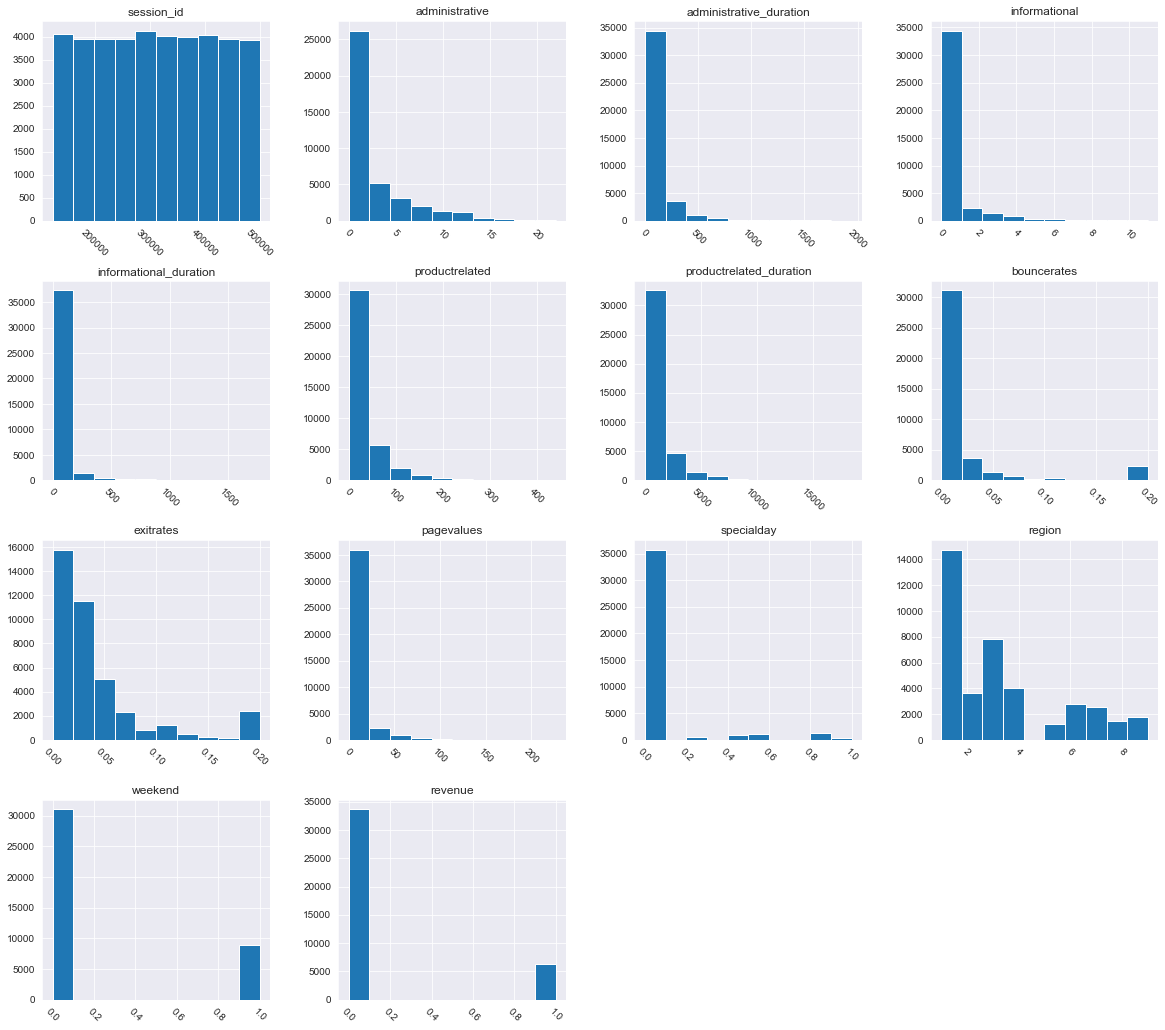

In [10]:
df.hist(figsize=(20,18), xrot=-45)
plt.show()
# observations
# get the exact percent of 0 values in each numeric features

Text(0.5, 0, 'Administrative Page Count')

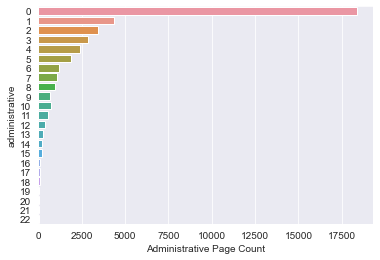

In [11]:
sns.countplot(y='administrative',data=df)
plt.xlabel('Administrative Page Count')

# Very less People visit Adinstritive Page

Text(0.5, 0, 'Informational Page Count')

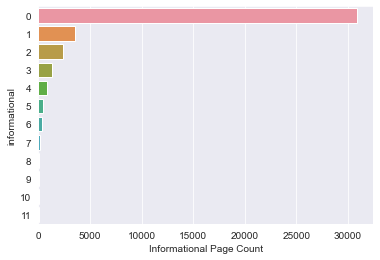

In [12]:
sns.countplot(y='informational',data=df)
plt.xlabel('Informational Page Count')

# Very less People visit Informational Page

In [13]:
for col in df.dtypes[df.dtypes != 'object'].index:
    print(col, ' - Value 0 - ' ,np.round((df[col] == 0).sum()/df.shape[0]*100, 2), '%')
    
# observations
# Session_id contains unique values
# "Administrative" - 45% of users in this dataset not visited this page
# "informational" - 77% of users in this dataset not visited this page
# "productrelated" - almost all users in this dataset visited this page
# "bouncerates" - 42% of sessions bounce rate is 0
# "exitrates" - almost all the sessions are visited and exited from there
# "pagevalues" - 75% of the sessions page value is 0
# "specialday" - only 10% of the sessions page not from special day
# "weekend" - 78% of session are not from weekend

# "revenue" - target variable 0 covered around 85% of dataset


session_id  - Value 0 -  0.0 %
administrative  - Value 0 -  45.99 %
administrative_duration  - Value 0 -  47.08 %
informational  - Value 0 -  77.26 %
informational_duration  - Value 0 -  78.48 %
productrelated  - Value 0 -  0.31 %
productrelated_duration  - Value 0 -  6.21 %
bouncerates  - Value 0 -  42.96 %
exitrates  - Value 0 -  0.63 %
pagevalues  - Value 0 -  75.16 %
specialday  - Value 0 -  89.3 %
region  - Value 0 -  0.0 %
weekend  - Value 0 -  77.63 %
revenue  - Value 0 -  84.17 %


In [14]:
# check the numerical feature
df.describe()
# there are some observations which need to take care 
## - productrelated_duration maximum value is 18504
## No missing values, will check is missing values marked with something else

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,region,weekend,revenue
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,311469.372075,2.544150,89.794383,0.555225,40.977236,34.026975,1148.105672,0.021969,0.042307,6.494963,0.063553,3.241975,0.223675,0.158275
std,108498.432497,3.667252,182.964645,1.332627,153.114387,46.798102,1666.181462,0.048533,0.048633,17.710646,0.199463,2.423586,0.416712,0.365003
min,123460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,217950.000000,0.000000,0.000000,0.000000,0.000000,7.000000,183.883333,0.000000,0.013389,0.000000,0.000000,1.000000,0.000000,0.000000
50%,311194.500000,1.000000,11.200000,0.000000,0.000000,19.000000,560.075000,0.003304,0.025000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,404680.500000,4.000000,110.154167,0.000000,0.000000,41.000000,1420.536667,0.016667,0.050000,0.000000,0.000000,4.000000,0.000000,0.000000
max,499982.000000,22.000000,1946.000000,11.000000,1767.666667,440.000000,18504.126210,0.200000,0.200000,226.677702,1.000000,9.000000,1.000000,1.000000


--------------------------------------------------------------------------------------------------------------------------------
### c) Distribution of Categorical features
--------------------------------------------------------------------------------------------------------------------------------

In [15]:
# check the catagorical feature
df.describe(include=['object'])
## - no nulls
## - month having 10 unique values, which 2 month are missing
## - operatingsystems	browser	traffictype	 looks like numerical variables need to figure out why its in object

,month,operatingsystems,browser,traffictype,visitortype
count,40000,40000,40000,40000,40000
unique,10,6,11,15,3
top,May,2,2,2,Returning_Visitor
freq,11048,21638,25540,12545,34496


In [16]:
for col in df.dtypes[df.dtypes == 'object'].index:
    print(col + '- ', df[col].unique())

# observations
# month - missing 2 months - Jan and Apr
# operatingsystems,browser and traffictype - these having numeric values except "*", 
# we consider this as missing value for these columns, and will take care in datacleaning and fill missing values section

month-  ['Nov' 'Dec' 'May' 'June' 'Mar' 'Sep' 'Aug' 'Oct' 'Jul' 'Feb']
operatingsystems-  ['2' '3' '1' '4' '8' '*']
browser-  ['2' '1' '10' '5' '7' '4' '8' '3' '6' '*' '13']
traffictype-  ['2' '3' '20' '1' '4' '11' '6' '13' '5' '*' '10' '8' '15' '7' '9']
visitortype-  ['Returning_Visitor' 'New_Visitor' 'Other']


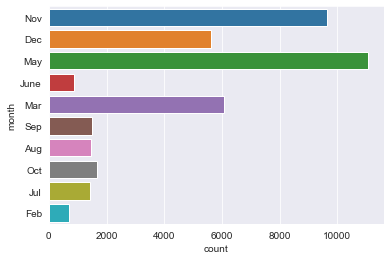

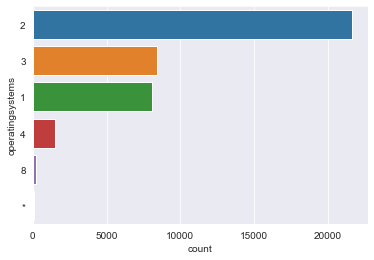

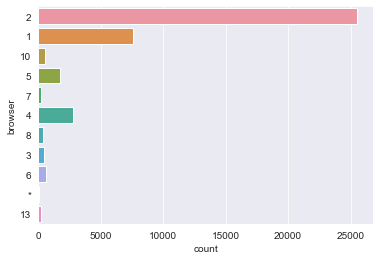

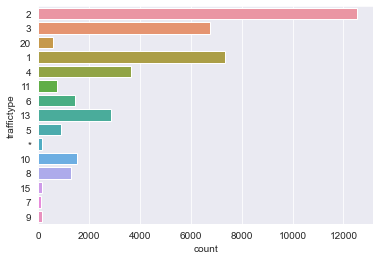

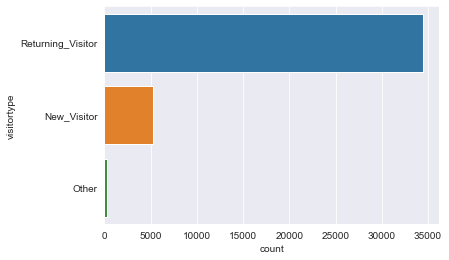

In [17]:
# lets plot some catogorical features and check their values
for col in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=col, data=df)
    plt.show()
# Observations
## - Month - Max sessions in the month of (Nov, Dec and Mar months), will see how it impact on revenue in segmentation

## operating systems - max used os are (1,2,3 and 4) rest all are sparce classes also * consider as missing

## browser - max used browsers are (1,2,5 and 4) rest all are sparce classes also * consider as missing

## as per domain and my understanding i don't see any impact of revenue based on operating system and browsers 
## because these are just used to visit the pages

## traffictype - max traffictypes are (1,2,3,4,6, 13 and 10) rest all are sparce classes also * consider as missing, 
## might be a factor related to revenue

--------------------------------------------------------------------------------------------------------------------------------
## d) Segmentation 
--------------------------------------------------------------------------------------------------------------------------------

In [18]:
# print all numeric features
df.dtypes[df.dtypes!='object']

session_id                   int64
administrative               int64
administrative_duration    float64
informational                int64
informational_duration     float64
productrelated               int64
productrelated_duration    float64
bouncerates                float64
exitrates                  float64
pagevalues                 float64
specialday                 float64
region                       int64
weekend                      int32
revenue                      int64
dtype: object

In [19]:
## our target variable revenue is numeric, for the segmentation 
## will create revenue_cat and convert revenue into categorical feature
df['revenue_cat'] = df.revenue.replace((0, 1), ('no', 'yes'))

In [20]:
# detailed stats of class
df.groupby('revenue_cat').mean()

# rest will in the segmentation

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,region,weekend,revenue
revenue_cat,,,,,,,,,,,,,,
no,311586.809380,2.300722,81.199407,0.490659,35.570859,30.289673,1017.663992,0.025037,0.046394,2.594997,0.070364,3.252606,0.220024,0.0
yes,310844.826726,3.838730,135.503473,0.898594,69.728981,53.902385,1841.809811,0.005654,0.020573,27.235442,0.027326,3.185437,0.243090,1.0


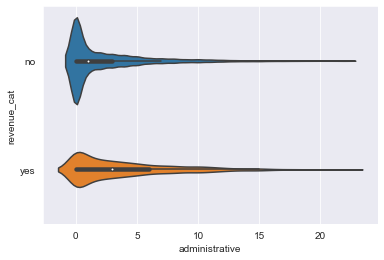

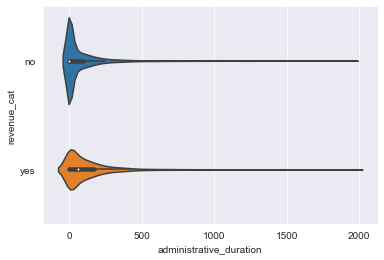

In [21]:
# our target variable is revenue_cat will check it with other variables by using violen plot
# 1. with administrative
sns.violinplot(y='revenue_cat', x='administrative', data=df)
plt.show()
# Observations
# - most of no lies under 5
# - most of yes are under 13

# with administrative duration on page
sns.violinplot(y='revenue_cat', x='administrative_duration', data=df)
plt.show()
# Observations
# - most of no lies under 300
# - most of yes are under 400


In [22]:
# check the outliers data of administrative page
# check those outliers records > 15
print(df[df.administrative >= 15]['administrative'].count())
# there are around 608 observations
df[df.administrative >= 15]

608


,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue,revenue_cat
40,171411,15,185.500000,0,0.000000,28,506.746667,0.006462,0.021289,0.000000,0.0,Nov,2,2,4,1,Returning_Visitor,0,0,no
116,168121,16,180.372222,9,266.750000,78,1998.866755,0.008385,0.024298,5.967872,0.0,Jul,2,2,5,2,Returning_Visitor,0,0,no
166,198497,16,265.166667,4,252.416667,45,1039.316667,0.008078,0.015681,33.760423,0.0,May,2,2,3,6,Returning_Visitor,0,0,no
230,205737,15,219.500000,3,155.000000,99,3714.512049,0.001662,0.018274,0.000000,0.0,Dec,3,2,1,2,Returning_Visitor,0,0,no
234,126820,22,198.133333,0,0.000000,78,1524.510476,0.000000,0.010380,0.000000,0.0,May,3,2,1,2,Returning_Visitor,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39829,357710,15,244.033333,4,396.000000,65,2953.451273,0.007771,0.022596,8.789038,0.0,Mar,2,4,3,1,Returning_Visitor,0,1,yes
39907,364997,18,111.300000,3,65.366667,36,1483.688514,0.000534,0.017837,1.799000,0.0,Mar,2,4,3,2,Returning_Visitor,0,0,no
39941,329418,19,424.011100,6,1018.150000,144,6985.196309,0.001515,0.019246,3.282420,0.0,Dec,2,2,1,2,Returning_Visitor,0,0,no
39971,425205,21,124.914586,0,0.000000,56,1265.656067,0.000000,0.004412,0.000000,0.0,Dec,2,2,4,1,Returning_Visitor,0,0,no


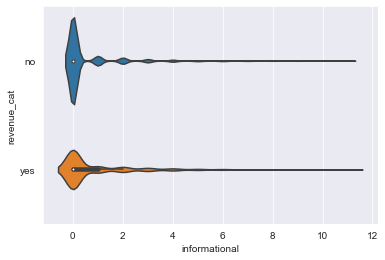

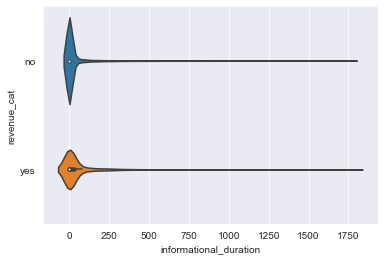

In [23]:
# 2. with informational
sns.violinplot(y='revenue_cat', x='informational', data=df)
plt.show()
# Observations
# - most of no lies under 3
# - most of yes are under 3

# with informational duration on page
sns.violinplot(y='revenue_cat', x='informational_duration', data=df)
plt.show()
# Observations
# - most of no lies under 250
# - most of yes are under 250

In [24]:
# check the outliers data of administrative page
# check those outliers records > 15
print(df[df.informational >= 6]['informational'].count())
# there are around 639 observations
df[df.informational >= 6]

639


,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue,revenue_cat
69,480068,7,301.064945,9,220.133333,54,1449.780342,0.026228,0.041739,6.103393,0.0,Nov,1,1,4,1,Returning_Visitor,0,0,no
91,295829,0,0.000000,6,251.666667,55,1086.000514,0.001254,0.009050,0.000000,0.0,Dec,2,2,6,2,Returning_Visitor,0,0,no
116,168121,16,180.372222,9,266.750000,78,1998.866755,0.008385,0.024298,5.967872,0.0,Jul,2,2,5,2,Returning_Visitor,0,0,no
123,192663,0,0.000000,6,509.303333,12,343.466667,0.000000,0.006263,0.000000,0.0,Dec,2,4,1,2,New_Visitor,0,0,no
184,315059,5,319.099451,8,1367.750000,65,2248.082859,0.018266,0.022349,29.497384,0.0,Jul,3,2,4,2,Returning_Visitor,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39645,282368,0,0.000000,10,1767.666667,43,1288.550000,0.052611,0.094289,0.000000,0.4,May,2,2,4,11,New_Visitor,0,0,no
39756,160956,3,73.200000,6,395.800000,20,286.240000,0.014285,0.033124,0.000000,0.0,Nov,1,1,1,2,Returning_Visitor,0,0,no
39806,381767,2,206.366667,6,165.583333,22,1494.628422,0.000000,0.011690,35.391759,0.0,Dec,2,2,1,2,New_Visitor,0,1,yes
39882,151937,13,310.604313,7,204.000000,119,5711.307442,0.008421,0.024043,60.042239,0.0,Dec,2,2,3,1,Returning_Visitor,0,0,no


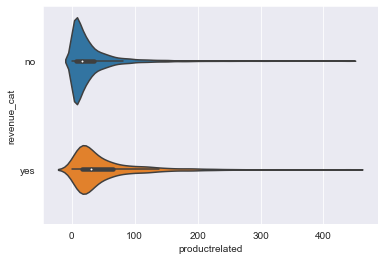

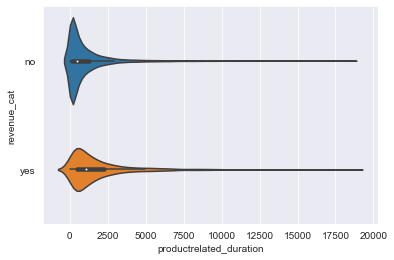

In [25]:
# 3. with productrelated
sns.violinplot(y='revenue_cat', x='productrelated', data=df)
plt.show()
# Observations
# - most of no lies under 150
# - most of yes are under 200

# with administrative duration on page
sns.violinplot(y='revenue_cat', x='productrelated_duration', data=df)
plt.show()
# Observations
# - most of no lies under 5000
# - most of yes are under 17000


In [26]:
# check the outliers data of productrelated page
# check those outliers records > 17500
print(df[df.productrelated_duration >=17500]['productrelated_duration'].count())
# there are around 27 observations
df[df.productrelated_duration >= 17500]

27


,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue,revenue_cat
285,457513,12,244.163359,6,44.996667,157,18504.12621,0.008590,0.038039,8.765060,0.0,Nov,1,1,3,1,Returning_Visitor,0,0,no
994,144982,12,1471.664017,11,148.166668,440,18504.12621,0.007395,0.010385,7.137458,0.0,Nov,1,1,2,2,Returning_Visitor,0,1,yes
1386,482568,14,233.095609,3,36.000000,337,18504.12621,0.000232,0.014428,12.434203,0.0,Nov,2,2,1,2,Returning_Visitor,0,1,yes
3064,188014,15,1106.721661,11,767.725000,204,18504.12621,0.000010,0.007782,10.535278,0.0,Dec,2,2,3,3,Returning_Visitor,0,0,no
3451,315448,12,750.952333,6,1130.725000,371,18504.12621,0.001280,0.011841,7.376894,0.0,Nov,3,2,4,2,Returning_Visitor,0,0,no
6176,355221,10,1946.000000,3,97.000000,324,18504.12621,0.009118,0.019217,0.000000,0.0,Nov,2,10,1,2,Returning_Visitor,0,1,yes
6501,478074,14,258.333333,6,1012.400000,177,18504.12621,0.008783,0.014602,3.006600,0.0,Nov,3,2,1,1,Returning_Visitor,1,1,yes
8009,436750,11,113.875722,5,119.666667,188,18504.12621,0.005781,0.016067,1.371600,0.0,Nov,2,2,3,1,Returning_Visitor,0,0,no
10170,385334,13,261.100000,9,338.066667,113,18504.12621,0.004620,0.008283,12.007680,0.0,Nov,2,2,1,2,Returning_Visitor,0,1,yes
10937,465906,13,286.040000,3,1491.750000,141,18504.12621,0.005737,0.012847,2.270419,0.0,May,2,2,1,6,Returning_Visitor,0,1,yes


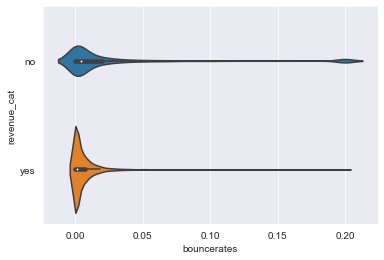

In [27]:
# 4. with bouncerates
sns.violinplot(y='revenue_cat', x='bouncerates', data=df)
plt.show()
# Observations
# - most of no lies under 0.6
# - most of yes are under 0.4

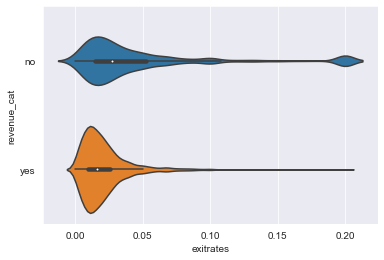

In [28]:
# 5. with exitrates
sns.violinplot(y='revenue_cat', x='exitrates', data=df)
plt.show()
# Observations
# - most of no lies under 0.12
# - most of yes are under 0.9

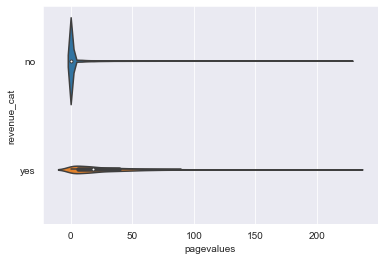

In [29]:
# 5. with pagevalues
sns.violinplot(y='revenue_cat', x='pagevalues', data=df)
plt.show()
# Observations
# - most of no lies under 10
# - most of yes is distributed among the range b/w 0-100

In [30]:
# check the outliers data of productrelated page
# check those outliers records > 200
print(df[df.pagevalues >=200]['pagevalues'].count())
# there are around 591 observations
df[df.pagevalues >= 200]

39


,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue,revenue_cat
582,174423,4,212.250000,0,0.0,49,2465.366667,0.000000,0.004061,226.677702,0.0,Nov,2,2,4,2,Returning_Visitor,1,0,no
1074,480164,0,0.000000,0,0.0,4,634.833333,0.000000,0.033061,226.677702,0.0,Nov,2,2,5,1,Returning_Visitor,0,1,yes
1879,377206,0,0.000000,0,0.0,72,1100.750000,0.000000,0.009383,226.677702,0.0,May,2,2,4,2,Returning_Visitor,0,0,no
2916,375128,1,5.000000,0,0.0,35,580.433333,0.000000,0.005000,213.751291,0.0,Dec,2,2,2,2,Returning_Visitor,1,1,yes
4147,441091,0,0.000000,0,0.0,9,411.166667,0.000000,0.011667,226.677702,0.0,Nov,8,13,9,20,Other,0,1,yes
4386,451654,3,35.200000,0,0.0,25,173.108333,0.012758,0.026470,226.677702,0.0,Dec,3,6,6,1,Returning_Visitor,0,0,no
4813,389886,1,318.300000,0,0.0,13,525.326667,0.000000,0.004444,207.073790,0.0,May,2,2,4,2,Returning_Visitor,0,1,yes
5463,482939,0,0.000000,0,0.0,47,1018.666667,0.000000,0.000000,226.677702,0.0,Dec,8,13,9,20,Other,0,1,yes
7127,404996,2,79.300000,0,0.0,7,346.600000,0.000000,0.018785,226.677702,0.0,Nov,2,2,1,2,Returning_Visitor,0,1,yes
8282,226782,3,117.000000,0,0.0,12,906.500000,0.000000,0.016667,213.483652,0.0,Dec,2,2,1,1,Returning_Visitor,0,0,no


In [31]:
# higher the page value, higher the revenue
df[df.pagevalues >= 30].groupby('revenue').count()

# there are around 70% revenue genereated based on high page value

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue_cat
revenue,,,,,,,,,,,,,,,,,,,
0,875,875,875,875,875,875,875,875,875,875,875,875,875,875,875,875,875,875,875
1,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167,2167


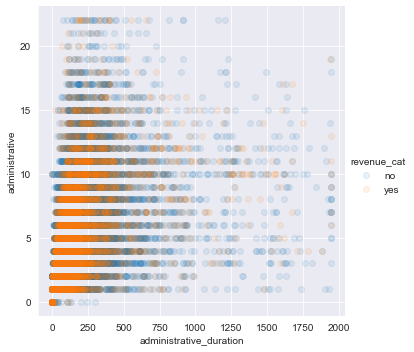

In [32]:
# how fetaures - administrative and administrative_duration related to the revenue
sns.lmplot(y='administrative', x='administrative_duration', hue='revenue_cat', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()

# observation
# most of the values fall under < 15 administrative and < 600 administrative_duration
# We can create a new fetaure administrative_importance depend on this information
# When administrative go more than 15 then no revenue earned
# administrative less than 2 not spend much time 

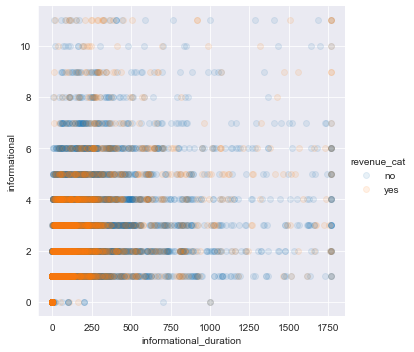

In [33]:
# how fetaures - informational and informational_duration related to the revenue
sns.lmplot(y='informational', x='informational_duration', hue='revenue_cat', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()

# observation
# most of the values fall under < 7 and > 0 informational and < 700 informational_duration
# We can create a new fetaure informational_importance depend on this information

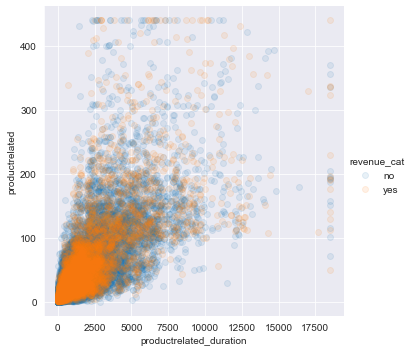

In [34]:
# how fetaures - productrelated and productrelated_duration related to the revenue
sns.lmplot(y='productrelated', x='productrelated_duration', hue='revenue_cat', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()

# observation
# most of the values fall under < 200 productrelated and < 7000 productrelated_duration
# We can create a new fetaure productrelated_importance depend on this information
# productrelated page more visited than administrative and informational

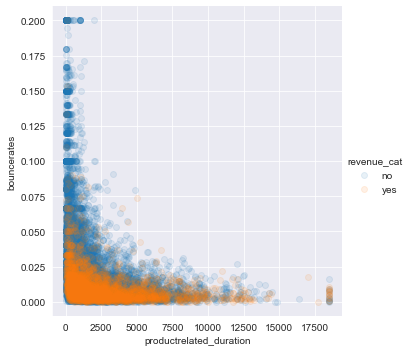

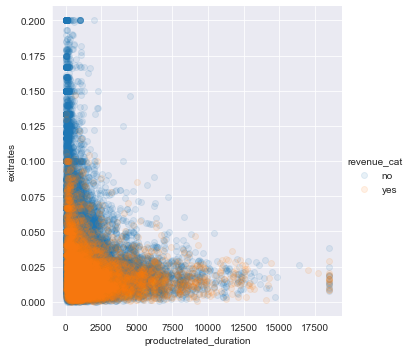

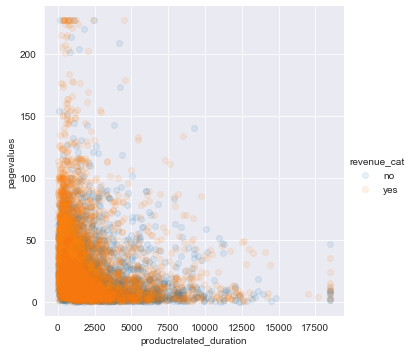

In [35]:
# how fetaures - bouncerates, exitrates and pagevalues with productrelated_duration related to the revenue
sns.lmplot(y='bouncerates', x='productrelated_duration', hue='revenue_cat', data=df[(df.productrelated_duration > 0) & (df.bouncerates > 0)], scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()
# bouncerates - lower bounce rate < 0.05 leads to yes
sns.lmplot(y='exitrates', x='productrelated_duration', hue='revenue_cat', data=df[(df.productrelated_duration > 0) & (df.exitrates > 0)], scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()

sns.lmplot(y='pagevalues', x='productrelated_duration', hue='revenue_cat',  data=df[(df.productrelated_duration > 0) & (df.pagevalues > 0)], scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()

# productrelated pages visited by user is more it increases pagevalue and high chances of revenue
# bouncerate and exitvalues for productrelated not much useful

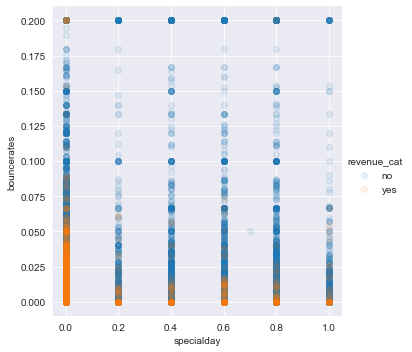

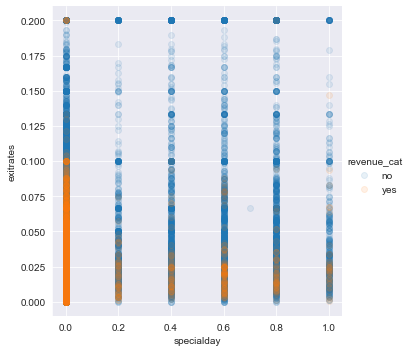

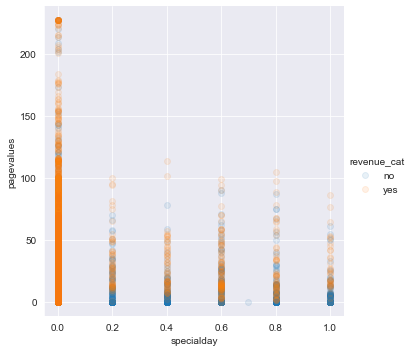

In [36]:
# how fetaures - bouncerates, exitrates and pagevalues with specialday related to the revenue
sns.lmplot(y='bouncerates', x='specialday', hue='revenue_cat', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()
# bouncerates - lower bounce rate < 0.05 leads to yes
sns.lmplot(y='exitrates', x='specialday', hue='revenue_cat', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()

sns.lmplot(y='pagevalues', x='specialday', hue='revenue_cat',  data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()

# pagevalue is the important feature for revenue.

In [37]:
# convert our features traffictype and visitortype into numerical to get more insights on segmentation
df['traffictype'] = df.traffictype.replace('*', '0').astype(int)
df.visitortype.replace(('Returning_Visitor', 'New_Visitor', 'Other'),(1,2,0), True)

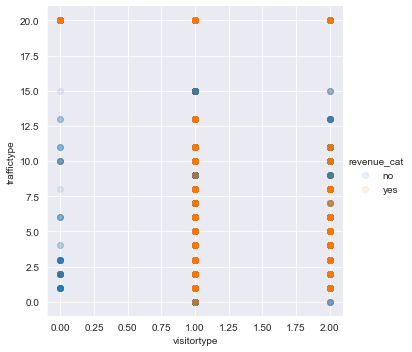

In [38]:
# how fetaures - traffictype, visitortype related to the revenue
sns.lmplot(y='traffictype', x='visitortype', hue='revenue_cat', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()
# New_Visitor is important to revenue = yes
# traffictype < 20 is good for revenue = yes

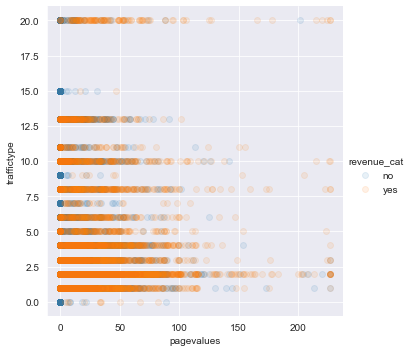

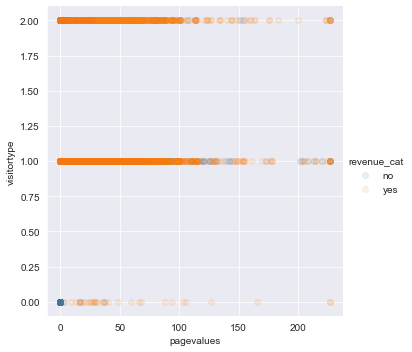

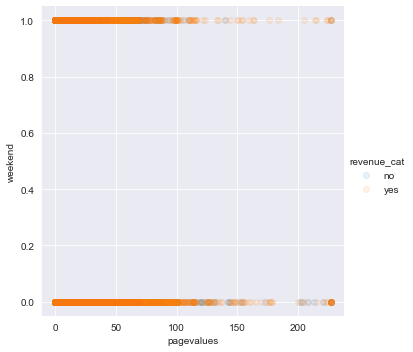

In [39]:
# how fetaures - weekend, traffictype, visitortype with pagevalues related to the revenue
sns.lmplot(y='traffictype', x='pagevalues', hue='revenue_cat', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()

sns.lmplot(y='visitortype', x='pagevalues', hue='revenue_cat', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()

sns.lmplot(y='weekend', x='pagevalues', hue='revenue_cat', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()
# New_Visitor is important to revenue = yes
# traffictype < 20 is good for revenue = yes

Text(0, 0.5, 'Mean Time Spent')

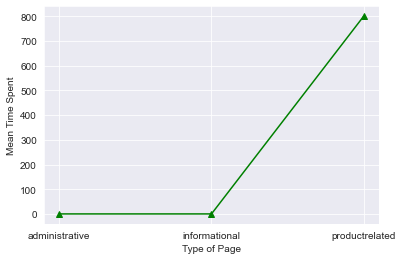

In [40]:
# get the mean of all pages visited and get the insight

adm=np.mean((df['administrative']/df['administrative_duration']).replace(np.inf,np.nan).dropna())
inm=np.mean((df['informational']/df['informational_duration']).replace(np.inf,np.nan).dropna())
prm=np.mean((df['productrelated']/df['productrelated_duration']).replace(np.inf,np.nan).dropna())
pagm=pd.Series([adm,inm,prm],index=['administrative','informational','productrelated'])
plt.plot(pagm.index,pagm.values,'-^g')
plt.xlabel('Type of Page')
plt.ylabel('Mean Time Spent')

# more time spend on productrelated than other pages

<AxesSubplot:xlabel='month', ylabel='count'>

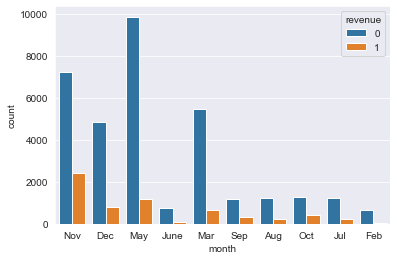

In [41]:
# relation of revenue with other variables
sns.countplot(x='month', hue='revenue', data=df)

# More revenue generated in 4 months - Nov, May, Dec and March
# Important months are November, December,May and March. Perhaps there is a big sale or festive season

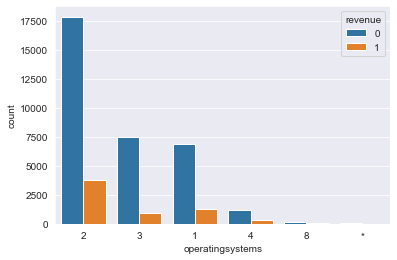

In [42]:
# relation of revenue with other variables
sns.countplot(x='operatingsystems', hue='revenue', data=df)
plt.show()

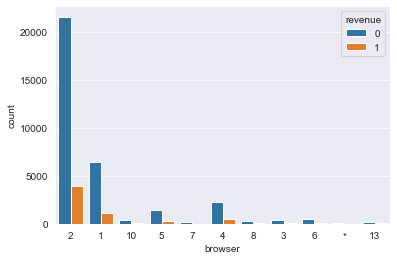

In [43]:
# relation of revenue with other variables
sns.countplot(x='browser', hue='revenue', data=df)
plt.show()

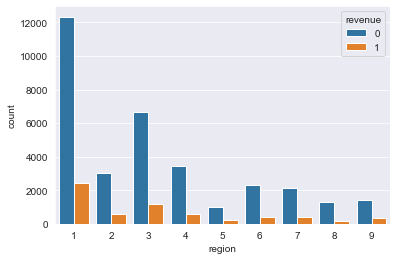

In [44]:
# relation of revenue with other variables
sns.countplot(x='region', hue='revenue', data=df)
plt.show()

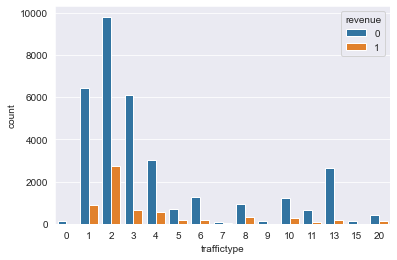

In [45]:
# relation of revenue with other variables
sns.countplot(x='traffictype', hue='revenue', data=df)
plt.show()

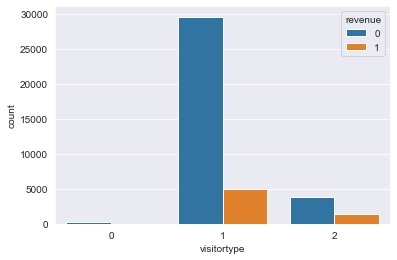

In [46]:
sns.countplot(x='visitortype', hue='revenue', data=df)
plt.show()
# lot of returning customers arent purchasing


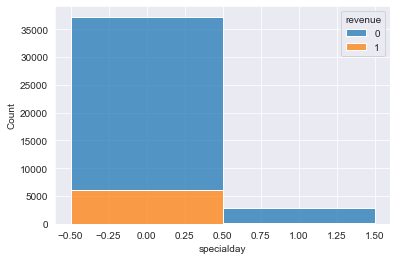

In [47]:
sns.histplot(data=df,x='specialday',hue='revenue',multiple='stack',discrete = True);
# Most of the revenue is generated when special day ranges from (-0.5 to 0.5)

In [48]:
# convert our features month, operatingsystems and browser into numerical to get more insights on segmentation
df['operatingsystems'] = df.operatingsystems.replace('*', '0').astype(int)
df['browser'] = df.browser.replace('*', '0').astype(int)
df.month.replace(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'),(1,2,3,4,5,6,7,8,9,10,11,12), True)

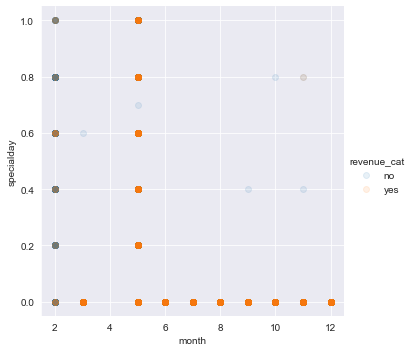

In [49]:
# Special day with month based on revenue, check is there any impact of special day
# on months those have big revenue - Non, Dec, May and March
sns.lmplot(y='specialday', x='month', hue='revenue_cat', data=df, scatter_kws={'alpha':0.1}, fit_reg=False)
plt.show()
# observation-
# May month is very important where revenue generated

--------------------------------------------------------------------------------------------------------------------------------
### e) Correlation
--------------------------------------------------------------------------------------------------------------------------------

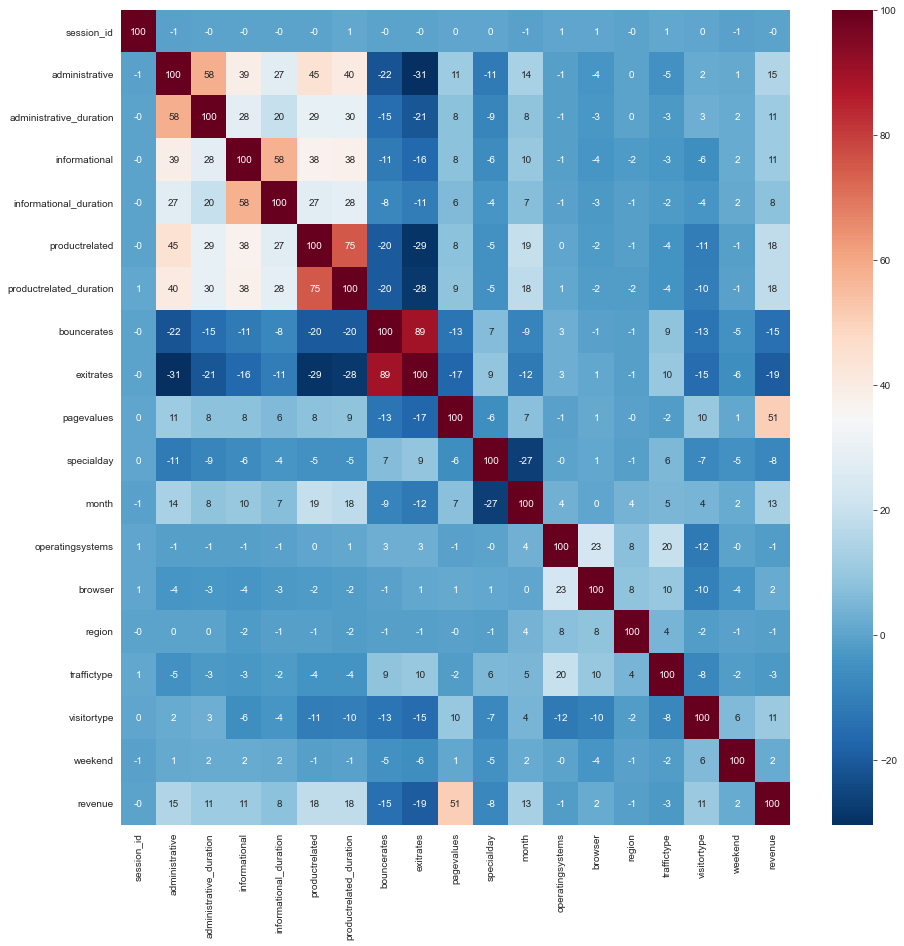

In [50]:
# Check the correlation between numeric features
df.head()
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr*100, fmt= '.0f' , cmap='RdBu_r', annot=True)
plt.show()
# revenue has highly +ve correlation with "pagevalues"
# exitrates and bouncerates has highly +ve correlation
# each pages has +ve correlation with each other

--------------------------------------------------------------------------------------------------------------------------------
# 4) Data Cleaning
--------------------------------------------------------------------------------------------------------------------------------

## a) Unwanted Observations

In [51]:
# get the dataset
df = pd.read_csv('ecommerce_train.csv')
df.head()

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,139957,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,Nov,2,2,3,2,Returning_Visitor,False,0
1,496587,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,Dec,3,2,6,3,Returning_Visitor,False,0
2,440268,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,Nov,2,2,1,20,Returning_Visitor,False,0
3,294672,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,Nov,2,2,1,2,Returning_Visitor,True,1
4,497475,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,Dec,3,2,5,2,Returning_Visitor,False,0


In [52]:
# drop unwanted observations
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)
# there are 0 duplicates

(40000, 19)
(40000, 19)


## b) Structural Errors & Missing Data

In [53]:
# Convert month data into numeric
month_dict = { 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug':8, 'Sep':9, 'Oct': 10, 
    'Nov': 11, 'Dec': 12}
df.month.replace(month_dict, inplace=True)

In [54]:
# Replace missing value * with 0 and create a another column operatingsystems_missing
df['operatingsystems_missing'] = (df.operatingsystems == '*').astype(int)
df['operatingsystems'] = df.browser.replace('*', '0').astype(int)

In [55]:
# Replace missing value * with 0 and create a another column browser_missing
df['browser_missing'] = (df.browser == '*').astype(int)
df['browser'] = df.browser.replace('*', '0').astype(int)

In [56]:
# Replace missing value * with 0 and create a another column traffictype_missing
df['traffictype_missing'] = (df.traffictype == '*').astype(int)
df['traffictype'] = df.browser.replace('*', '0').astype(int)

In [57]:
# convert weekend from boolean to integer
df['weekend'] = df.weekend.astype(int)

## c) Outliers

In [58]:
# remove unwanted column session_id
# This value will likely be meaningless for predicting revenue, and it shows no relationship with other variables.
df = df.drop('session_id', axis=1)
df.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue,operatingsystems_missing,browser_missing,traffictype_missing
0,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,11,2,2,3,2,Returning_Visitor,0,0,0,0,0
1,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,12,2,2,6,2,Returning_Visitor,0,0,0,0,0
2,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,11,2,2,1,2,Returning_Visitor,0,0,0,0,0
3,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,11,2,2,1,2,Returning_Visitor,1,1,0,0,0
4,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,12,2,2,5,2,Returning_Visitor,0,0,0,0,0


In [59]:
# store our cleaned dataset
df.to_csv('ecommerce_cleaned_date.csv', index=None)

# 5) Feature Engineering

In [60]:
# get cleaned dataset
df = pd.read_csv('ecommerce_cleaned_date.csv')

In [61]:
# check any Null in categorical features
df.select_dtypes(include=['object']).isnull().sum()

visitortype    0
dtype: int64

In [62]:
# check any Null in numeric features
df.select_dtypes(exclude=['object']).isnull().sum()

administrative              0
administrative_duration     0
informational               0
informational_duration      0
productrelated              0
productrelated_duration     0
bouncerates                 0
exitrates                   0
pagevalues                  0
specialday                  0
month                       0
operatingsystems            0
browser                     0
region                      0
traffictype                 0
weekend                     0
revenue                     0
operatingsystems_missing    0
browser_missing             0
traffictype_missing         0
dtype: int64

## a) Domain Knowledge & Heuristics

In [63]:
# based on our segmentation we can create some more features which can help our model to give priority
1. # observation
# most of the values fall under < 15 administrative and < 600 administrative_duration
# We can create a new fetaure administrative_importance depend on this information

df['administrative_importance'] = ((df.administrative < 15) &( df.administrative_duration < 600)).astype(int)

In [64]:
# 2. # observation
# most of the values fall under < 7 and > 0 informational and < 700 informational_duration
# We can create a new fetaure informational_importance depend on this information

df['informational_importance'] = ((df.informational < 7) & (df.informational > 1) & ( df.informational_duration < 700)).astype(int)

In [65]:
# 3. # observation
# most of the values fall under < 200 productrelated and < 7000 productrelated_duration
# We can create a new fetaure productrelated_importance depend on this information

df['productrelated_importance'] = ((df.productrelated < 200) & ( df.productrelated_duration < 7000)).astype(int)

In [66]:
# important months influence the model
df['important_months'] = (df.month.isin([11,12,5,3])).astype(int)

In [67]:
# special days with month
df['special_day_month'] = (df.month.isin([5])).astype(int)

In [68]:
# higher page value higher the revenue chance
df['high_pagevalue'] = (df.pagevalues >= 30)

## b) Prepare ABT

In [69]:
df.dtypes

administrative                 int64
administrative_duration      float64
informational                  int64
informational_duration       float64
productrelated                 int64
productrelated_duration      float64
bouncerates                  float64
exitrates                    float64
pagevalues                   float64
specialday                   float64
month                          int64
operatingsystems               int64
browser                        int64
region                         int64
traffictype                    int64
visitortype                   object
weekend                        int64
revenue                        int64
operatingsystems_missing       int64
browser_missing                int64
traffictype_missing            int64
administrative_importance      int32
informational_importance       int32
productrelated_importance      int32
important_months               int32
special_day_month              int32
high_pagevalue                  bool
d

In [70]:
# using one hot encoding technique to convert all categorical features into numerical
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
list_objects = list(df.dtypes[df.dtypes == 'object'].index)
ohe.fit_transform(df[list_objects])
df = df.join(pd.DataFrame(ohe.fit_transform(df[list_objects]), columns=ohe.get_feature_names())).drop(columns=list_objects)

In [71]:
# prepare Abstract Base table after creating all features
df.to_csv('ecommerce_abstract_base_table.csv', index=None)

# 6) Algorithm Selection

In [72]:
# Algorithms
# As this is a binar classification problem and we need to predict user generate revenue or not.
# we choose below algorithms:
# - Logistic Regression
# - Decision Tree classifier
# - Naie Bayes
# - Knn
# - SVM - not very good in this usecase, so removed
# - Random forest classifier
# - Gradient Boosted classifier

# We need to tune Hyperparameters and fit our model with the training dataset to get the best model

# 7) Model Training

## a) Data Spending

In [73]:
# getting ABT dataset
df = pd.read_csv('ecommerce_abstract_base_table.csv')
print(df.shape)
df.head()

(40000, 29)


,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,weekend,revenue,operatingsystems_missing,browser_missing,traffictype_missing,administrative_importance,informational_importance,productrelated_importance,important_months,special_day_month,high_pagevalue,x0_New_Visitor,x0_Other,x0_Returning_Visitor
0,2,47.500000,0,0.0,19,1203.480714,0.000000,0.027421,6.748509,0.0,11,2,2,3,2,0,0,0,0,0,1,0,1,1,0,False,0.0,0.0,1.0
1,0,0.000000,0,0.0,7,152.000000,0.000000,0.033333,0.000000,0.0,12,2,2,6,2,0,0,0,0,0,1,0,1,1,0,False,0.0,0.0,1.0
2,7,206.500000,1,389.9,95,4415.889952,0.000133,0.033750,2.676062,0.0,11,2,2,1,2,0,0,0,0,0,1,0,1,1,0,False,0.0,0.0,1.0
3,1,18.258571,0,0.0,103,8305.048706,0.004871,0.034746,6.824908,0.0,11,2,2,1,2,1,1,0,0,0,1,0,0,1,0,False,0.0,0.0,1.0
4,0,0.000000,0,0.0,42,1305.108333,0.016068,0.039742,0.000000,0.0,12,2,2,5,2,0,0,0,0,0,1,0,1,1,0,False,0.0,0.0,1.0


In [74]:
# Split Dataset
X = df.drop('revenue', axis=1)
y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = df['revenue'], random_state = 1234)
print(len(X_train), len(X_test), len(y_train), len(y_test))

32000 8000 32000 8000


## b) Pre-Processing & Pipelines

In [75]:
# Build model pipelines
lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123))

dt = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=123))

svm = make_pipeline(StandardScaler(), SVC(random_state=123))

nb = make_pipeline(StandardScaler(), GaussianNB())

rf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123))

gb = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))

knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

pipelines = {'lr': lr,
             'dt': dt,
             'svm': svm,
             'nb': nb,
             'rf': rf,
             'gb':gb,
             'knn': knn
            }

## c) Hyperparameter Tuning

In [76]:
# Declare Hyperparameter Grids
lr_hyperparameters = {'logisticregression__C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}

dt_hyperparameters = {"decisiontreeclassifier__max_depth": [1,3,5],
              "decisiontreeclassifier__max_features": ['auto','sqrt', 0.33],
              "decisiontreeclassifier__min_samples_split": [1,3,5,10],
              "decisiontreeclassifier__criterion": ["gini", "entropy"]
}

svm_hyperparameters = {
#    'svc__C': [0.1, 1,10],
#    'svc__kernel':['rbf', 'sigmoid', 'linear', 'poly'],
#    'svc__gamma': ['scale', 'auto']
}

knn_hyperparameters = {
    'kneighborsclassifier__n_neighbors': [1,3,5,10,15],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

nb_hyperparameters = {
}

rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto','sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf': [1,3,5,10],
    "randomforestclassifier__criterion": ["gini", "entropy"]
} 

gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1,3,5]
} 

hyperparameters = {
    'lr': lr_hyperparameters, 
    'dt': dt_hyperparameters, 
    'svm': svm_hyperparameters,
    'nb': nb_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
    'knn': knn_hyperparameters
}

## d) Winner Selection

In [81]:
# Fit and Tune Models with Cross-Validation
fitted_model = {}
for name, pipeline in pipelines.items():
    print("------------------------------------------")
    print("Fiting Model", name)
    #model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    #model.fit(X_train, y_train)
    #fitted_model[name] = model
    print("Model {} fitted".format(name))

------------------------------------------
Fiting Model lr
Model lr fitted
------------------------------------------
Fiting Model dt
Model dt fitted
------------------------------------------
Fiting Model svm
Model svm fitted
------------------------------------------
Fiting Model nb
Model nb fitted
------------------------------------------
Fiting Model rf
Model rf fitted
------------------------------------------
Fiting Model gb
Model gb fitted
------------------------------------------
Fiting Model knn
Model knn fitted


---------------lr----------------
Best Score:  0.876125
Accuracy Score -  0.87525
Confusion Metrix : 
[[6523  211]
 [ 787  479]]
ROC Score:  0.8975182997694847


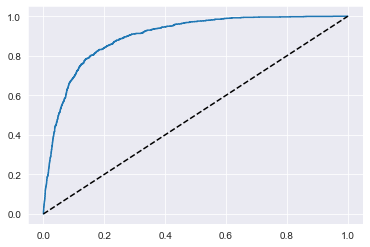

---------------dt----------------
Best Score:  0.8800625
Accuracy Score -  0.87875
Confusion Metrix : 
[[6513  221]
 [ 749  517]]
ROC Score:  0.8833412275355403


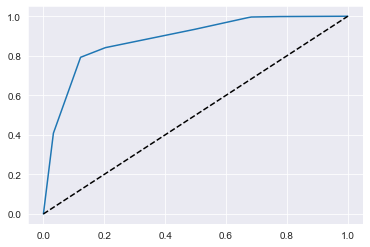

---------------svm----------------
Best Score:  0.8912812500000001
Accuracy Score -  0.895125
---------------knn----------------
Best Score:  0.87846875
Accuracy Score -  0.878
Confusion Metrix : 
[[6528  206]
 [ 770  496]]
ROC Score:  0.8811446921636495


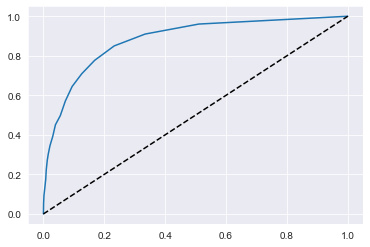

---------------nb----------------
Best Score:  0.742625
Accuracy Score -  0.738875
Confusion Metrix : 
[[5013 1721]
 [ 368  898]]
ROC Score:  0.8048488700147467


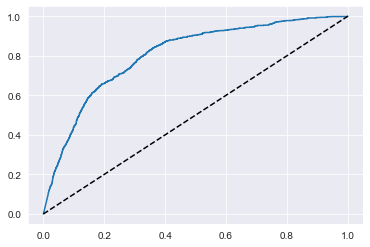

---------------rf----------------
Best Score:  0.9031874999999999
Accuracy Score -  0.902625
Confusion Metrix : 
[[6399  335]
 [ 444  822]]
ROC Score:  0.9401477541287966


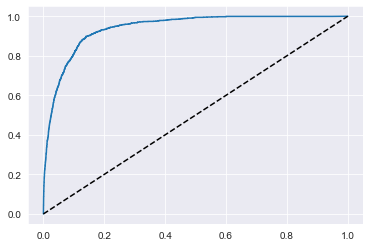

---------------gb----------------
Best Score:  0.9040937499999998
Accuracy Score -  0.903125
Confusion Metrix : 
[[6386  348]
 [ 427  839]]
ROC Score:  0.9396783833987624


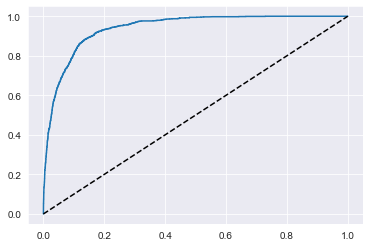

In [358]:
# Getting the best scores, confusion metrics and AUROC review to select the best model
for name, model in fitted_model.items():
    print("---------------{0}----------------".format(name))
    print("Best Score: ", model.best_score_)
    pred_class = fitted_model[name].predict(X_test)
    test_accuracy = accuracy_score(y_test, pred_class)
    print("Accuracy Score - ", test_accuracy)
    pred = fitted_model[name].predict_proba(X_test)
    pred = [p[1] for p in pred]
    cm = confusion_matrix(y_test, pred_class)
    print("Confusion Metrix : ")
    print(cm)
    fpr, tpr, threshold = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=name)
    plt.plot([0,1], [0,1], 'k--')
    print("ROC Score: ", roc_auc_score(y_test, pred))
    plt.show()

In [84]:
# pick the winning model and save

# got 2 models which gives accuracy > 0.90
# ----- rf  ---- Random Forest
# Best Score:  0.9031874999999999
# Accuracy Score -  0.902625
# Confusion Metrix : 
#  [[6399  335]
#   [ 444  822]]
# ROC Score:  0.9401477541287966

# ----- gb  ---- Gradient Boost
# Best Score:  0.90409375
# Accuracy Score -  0.903125
# Confusion Metrix : 
# [[6386  348]
#  [ 427  839]]
# ROC Score:  0.9396783833987624

# ---- Gradient Boost is the Winner with  0.9035 accuracy score -----

with open('ecommerce_final_model.pkl', 'wb') as f:
    pickle.dump(fitted_model['gb'].best_estimator_,f)

# 8) Insights & Analysis 

In [153]:
# Key findings and learning
# This dataset is really useful to get insights of numerical as well as categorical features
# This dataset has more Numeric than categorial features and that would really help to understand and give more experience  
# how to deal with Numeric features.
# I tried to improve the roc score to create features based on segmtations and it worked, i have improved my precentage by 1.5%

# Winning model
# My winning model is Random Forest which gives me best score, Accuracy Score as well as roc score

# The score also be improved more on tuning the dataset in data cleaning and create more into deep feature engineering.
# may be other algorithms then Random forest and Gradient Boost give more accurate score

# I have one additional Unseen dataset which has predicted value as well.
# will run our model into unseen dataset and check the accuracy


# 9) Check our model with Unseen data

In [85]:
# get our final model and print
with open('ecommerce_final_model.pkl', 'rb') as f:
    model = pickle.load(f)
print(model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            n_estimators=200,
                                            random_state=123))])


In [86]:
# create function of our cleaned dataset
def clean_data(df):
    # drop duplicates
    df.drop_duplicates(inplace=True)
    # Convert month data into numeric
    month_dict = { 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug':8, 'Sep':9, 'Oct': 10, 
        'Nov': 11, 'Dec': 12}
    df.month.replace(month_dict, inplace=True)

    # Replace missing value * with 0 and create a another column operatingsystems_missing
    df['operatingsystems_missing'] = (df.operatingsystems == '*').astype(int)
    df['operatingsystems'] = df.browser.replace('*', '0').astype(int)

    # Replace missing value * with 0 and create a another column browser_missing
    df['browser_missing'] = (df.browser == '*').astype(int)
    df['browser'] = df.browser.replace('*', '0').astype(int)

    # Replace missing value * with 0 and create a another column traffictype_missing
    df['traffictype_missing'] = (df.traffictype == '*').astype(int)
    df['traffictype'] = df.browser.replace('*', '0').astype(int)

    # convert weekend from boolean to integer
    df['weekend'] = df.weekend.astype(int)

    # remove unwanted column session_id
    # This value will likely be meaningless for predicting revenue, and it shows no relationship with other variables.
    df = df.drop('session_id', axis=1)
    
    return df

In [95]:
def engineer_features(df):
    # based on our segmentation we can create some more features which can help our model to give priority
    # 1. # observation
    # most of the values fall under < 15 administrative and < 600 administrative_duration
    # We can create a new fetaure administrative_importance depend on this information

    df['administrative_importance'] = ((df.administrative < 15) &( df.administrative_duration < 600)).astype(int)

    # 2. # observation
    # most of the values fall under < 7 and > 0 informational and < 700 informational_duration
    # We can create a new fetaure informational_importance depend on this information

    df['informational_importance'] = ((df.informational < 7) & (df.informational > 1) & ( df.informational_duration < 700)).astype(int)

    # 3. # observation
    # most of the values fall under < 200 productrelated and < 7000 productrelated_duration
    # We can create a new fetaure productrelated_importance depend on this information

    df['productrelated_importance'] = ((df.productrelated < 200) & ( df.productrelated_duration < 7000)).astype(int)

    
    # important months influence the model
    df['important_months'] = (df.month.isin([11,12,5,3])).astype(int)

    # special days with month
    df['special_day_month'] = (df.month.isin([5])).astype(int)

    # higher page value higher the revenue chance
    df['high_pagevalue'] = (df.pagevalues >= 30).astype(int)

    
    # using one hot encoding technique to convert all categorical features into numerical
    #ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    list_objects = list(df.dtypes[df.dtypes == 'object'].index)
    #ohe.transform(df[list_objects])
    df = df.join(pd.DataFrame(ohe.transform(df[list_objects]), columns=ohe.get_feature_names())).drop(columns=list_objects)
    
    # Return augmented DataFrame
    return df

In [96]:
# get our unseen data
raw_data = pd.read_csv('ecommerce_test.csv')
print(raw_data.shape)
raw_data.head()

(10000, 18)


,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend
0,283149,0,0.0,0,0.0,10,388.000000,0.000000,0.014286,0.0,0.0,Nov,1,2,8,2,New_Visitor,False
1,253020,0,0.0,0,0.0,17,142.400000,0.017707,0.044623,0.0,0.0,Nov,1,2,3,8,New_Visitor,False
2,348435,0,0.0,0,0.0,47,1683.733333,0.020556,0.026367,0.0,0.0,Mar,2,5,9,1,Returning_Visitor,False
3,299763,0,0.0,1,904.0,33,543.433333,0.000000,0.015713,0.0,0.0,Nov,2,2,3,11,Returning_Visitor,True
4,195120,0,0.0,2,17.0,4,0.000000,0.200000,0.200000,0.0,0.0,Mar,2,4,6,1,Returning_Visitor,True


In [97]:
# get the cleaned data
cleaned_data_df = clean_data(raw_data) 
print(cleaned_data_df.shape)
cleaned_data_df.head()

(10000, 20)


,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,operatingsystems_missing,browser_missing,traffictype_missing
0,0,0.0,0,0.0,10,388.000000,0.000000,0.014286,0.0,0.0,11,2,2,8,2,New_Visitor,0,0,0,0
1,0,0.0,0,0.0,17,142.400000,0.017707,0.044623,0.0,0.0,11,2,2,3,2,New_Visitor,0,0,0,0
2,0,0.0,0,0.0,47,1683.733333,0.020556,0.026367,0.0,0.0,3,5,5,9,5,Returning_Visitor,0,0,0,0
3,0,0.0,1,904.0,33,543.433333,0.000000,0.015713,0.0,0.0,11,2,2,3,2,Returning_Visitor,1,0,0,0
4,0,0.0,2,17.0,4,0.000000,0.200000,0.200000,0.0,0.0,3,4,4,6,4,Returning_Visitor,1,0,0,0


In [98]:
# get the ABT
augmented_data_df = engineer_features(cleaned_data_df)
print(augmented_data_df.shape)
augmented_data_df.head()

(10000, 28)


,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,weekend,operatingsystems_missing,browser_missing,traffictype_missing,administrative_importance,informational_importance,productrelated_importance,important_months,special_day_month,high_pagevalue,x0_New_Visitor,x0_Other,x0_Returning_Visitor
0,0,0.0,0,0.0,10,388.000000,0.000000,0.014286,0.0,0.0,11,2,2,8,2,0,0,0,0,1,0,1,1,0,0,1.0,0.0,0.0
1,0,0.0,0,0.0,17,142.400000,0.017707,0.044623,0.0,0.0,11,2,2,3,2,0,0,0,0,1,0,1,1,0,0,1.0,0.0,0.0
2,0,0.0,0,0.0,47,1683.733333,0.020556,0.026367,0.0,0.0,3,5,5,9,5,0,0,0,0,1,0,1,1,0,0,0.0,0.0,1.0
3,0,0.0,1,904.0,33,543.433333,0.000000,0.015713,0.0,0.0,11,2,2,3,2,1,0,0,0,1,0,1,1,0,0,0.0,0.0,1.0
4,0,0.0,2,17.0,4,0.000000,0.200000,0.200000,0.0,0.0,3,4,4,6,4,1,0,0,0,1,1,1,1,0,0,0.0,0.0,1.0


In [99]:
# get our feature and predicted 
X = augmented_data_df.copy()

# predict based on our RF model
pred_class = model.predict(X)
pred = model.predict_proba(X)
pred = [p[1] for p in pred]

In [102]:
# add our prediction with our actual target variable and see
raw_data['revenue'] = pred_class
raw_data['predicted_prob'] = pred
raw_data.head()

,session_id,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,operatingsystems_missing,browser_missing,traffictype_missing,predicted,predicted_prob,revenue
0,283149,0,0.0,0,0.0,10,388.000000,0.000000,0.014286,0.0,0.0,11,2,2,8,2,New_Visitor,0,0,0,0,0,0.056346,0
1,253020,0,0.0,0,0.0,17,142.400000,0.017707,0.044623,0.0,0.0,11,2,2,3,2,New_Visitor,0,0,0,0,0,0.053882,0
2,348435,0,0.0,0,0.0,47,1683.733333,0.020556,0.026367,0.0,0.0,3,5,5,9,5,Returning_Visitor,0,0,0,0,0,0.005738,0
3,299763,0,0.0,1,904.0,33,543.433333,0.000000,0.015713,0.0,0.0,11,2,2,3,2,Returning_Visitor,1,0,0,0,0,0.062319,0
4,195120,0,0.0,2,17.0,4,0.000000,0.200000,0.200000,0.0,0.0,3,4,4,6,4,Returning_Visitor,1,0,0,0,0,0.002837,0


In [103]:
# add our prediction with our actual target variable and see
raw_data['predicted_prob'] = (raw_data['predicted_prob'] * 100).round(2).astype(str) + "%"

In [104]:
submission_data = raw_data[['session_id','revenue']]

In [105]:
# store into a csv for further analysis and to improve our model
submission_data.to_csv('submission_team1_databots.csv', index=None)